In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# decision tree and random forest

In [2]:
import os
os.chdir('E:\intership')

In [3]:
data=pd.read_csv("aaa.csv")

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,8,183,64,0,0,23.3,0.672,32,pos
2,0,137,40,35,168,43.1,2.288,33,pos
3,3,78,50,32,88,31.0,0.248,26,pos
4,2,197,70,45,543,30.5,0.158,53,pos
...,...,...,...,...,...,...,...,...,...
544,10,101,76,48,180,32.9,0.171,63,neg
545,2,122,70,27,0,36.8,0.340,27,neg
546,5,121,72,23,112,26.2,0.245,30,neg
547,1,126,60,0,0,30.1,0.349,47,pos


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               549 non-null    int64  
 1   Glucose                   549 non-null    int64  
 2   BloodPressure             549 non-null    int64  
 3   SkinThickness             549 non-null    int64  
 4   Insulin                   549 non-null    int64  
 5   BMI                       549 non-null    float64
 6   DiabetesPedigreeFunction  549 non-null    float64
 7   Age                       549 non-null    int64  
 8   Diabetes                  549 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 38.7+ KB


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               549 non-null    int64  
 1   Glucose                   549 non-null    int64  
 2   BloodPressure             549 non-null    int64  
 3   SkinThickness             549 non-null    int64  
 4   Insulin                   549 non-null    int64  
 5   BMI                       549 non-null    float64
 6   DiabetesPedigreeFunction  549 non-null    float64
 7   Age                       549 non-null    int64  
 8   Diabetes                  549 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 38.7+ KB


In [7]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
544,False,False,False,False,False,False,False,False,False
545,False,False,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

In [9]:
data['Diabetes'].value_counts()

neg    281
pos    268
Name: Diabetes, dtype: int64

In [10]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,8,183,64,0,0,23.3,0.672,32,pos
2,0,137,40,35,168,43.1,2.288,33,pos
3,3,78,50,32,88,31.0,0.248,26,pos
4,2,197,70,45,543,30.5,0.158,53,pos
...,...,...,...,...,...,...,...,...,...
544,10,101,76,48,180,32.9,0.171,63,neg
545,2,122,70,27,0,36.8,0.340,27,neg
546,5,121,72,23,112,26.2,0.245,30,neg
547,1,126,60,0,0,30.1,0.349,47,pos


C:\Users\vagad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diabetes', ylabel='count'>

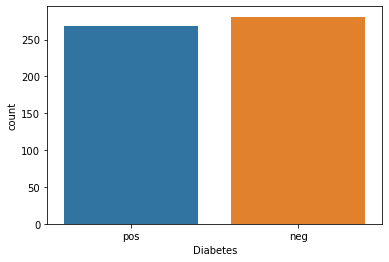

In [11]:
sns.countplot(data['Diabetes'], label ='Count')

<AxesSubplot:>

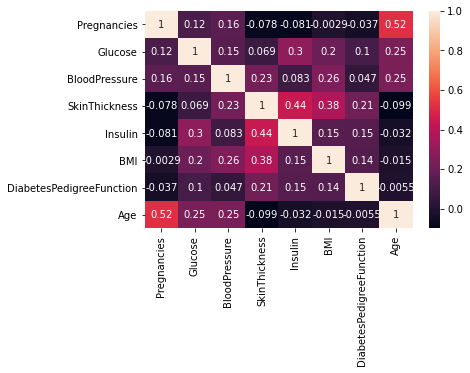

In [12]:
sns.heatmap(data.corr(), annot = True)

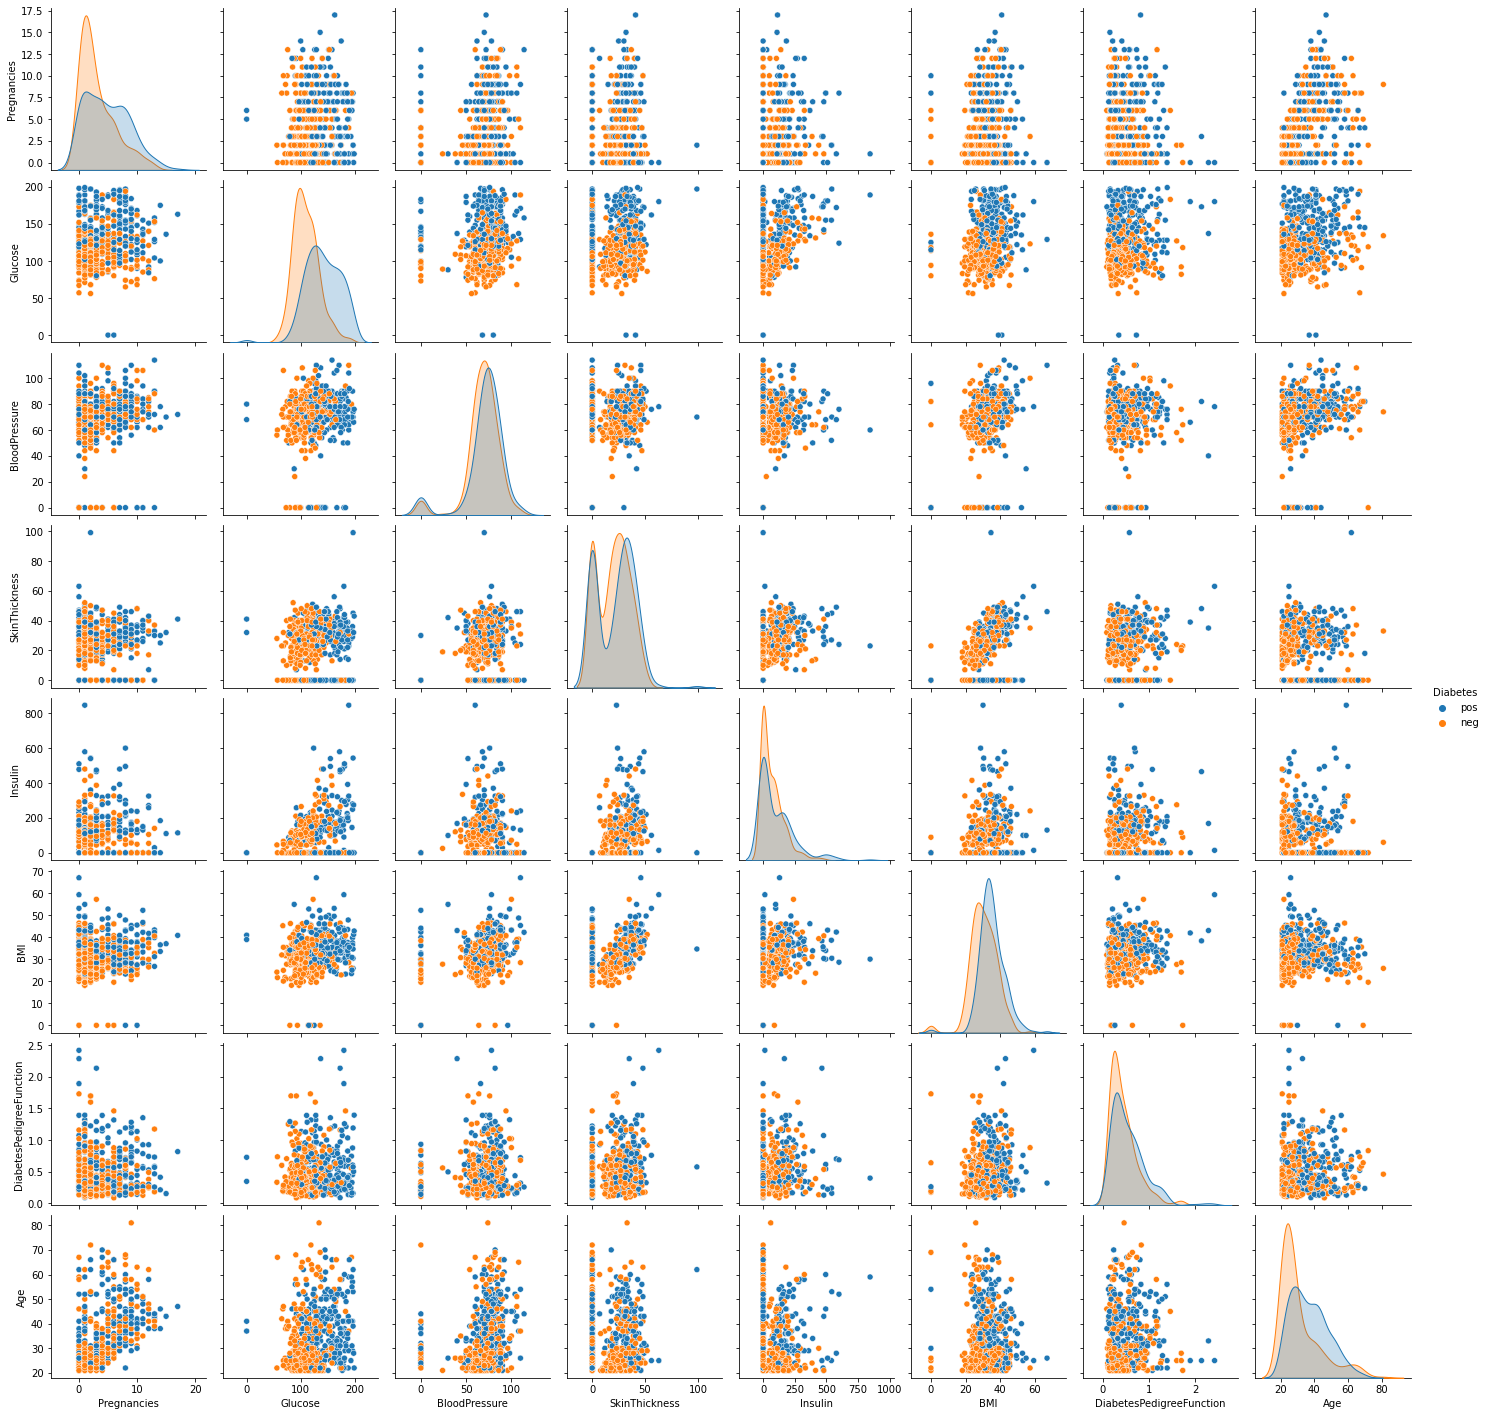

In [13]:
sns.pairplot(data,hue='Diabetes')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = data.drop("Diabetes",axis=1)

In [16]:
Y= data['Diabetes']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [19]:
predictions = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,predictions))
print('\n')
print(classification_report(Y_test,predictions))

[[47 27]
 [25 66]]


              precision    recall  f1-score   support

         neg       0.65      0.64      0.64        74
         pos       0.71      0.73      0.72        91

    accuracy                           0.68       165
   macro avg       0.68      0.68      0.68       165
weighted avg       0.68      0.68      0.68       165



In [21]:
feature_importance = pd.DataFrame(dtree.feature_importances_,
                                  index = X_train.columns,
                                  columns = ['importance'])
feature_importance

,importance
Pregnancies,0.012871
Glucose,0.405227
BloodPressure,0.063818
SkinThickness,0.032316
Insulin,0.015396
BMI,0.224451
DiabetesPedigreeFunction,0.083444
Age,0.162477


In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [23]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(Y_test,rfc_pred))
print('\n')
print(classification_report(Y_test,rfc_pred))

[[53 21]
 [29 62]]


              precision    recall  f1-score   support

         neg       0.65      0.72      0.68        74
         pos       0.75      0.68      0.71        91

    accuracy                           0.70       165
   macro avg       0.70      0.70      0.70       165
weighted avg       0.70      0.70      0.70       165



# KNN classification

In [24]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,8,183,64,0,0,23.3,0.672,32,pos
2,0,137,40,35,168,43.1,2.288,33,pos
3,3,78,50,32,88,31.0,0.248,26,pos
4,2,197,70,45,543,30.5,0.158,53,pos


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               549 non-null    int64  
 1   Glucose                   549 non-null    int64  
 2   BloodPressure             549 non-null    int64  
 3   SkinThickness             549 non-null    int64  
 4   Insulin                   549 non-null    int64  
 5   BMI                       549 non-null    float64
 6   DiabetesPedigreeFunction  549 non-null    float64
 7   Age                       549 non-null    int64  
 8   Diabetes                  549 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 38.7+ KB


C:\Users\vagad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diabetes', ylabel='count'>

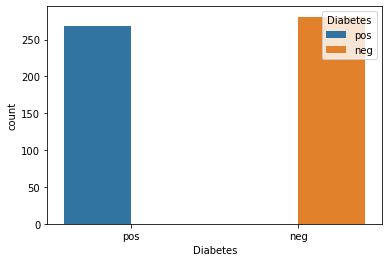

In [26]:
sns.countplot(data['Diabetes'],hue=data['Diabetes'])

<AxesSubplot:>

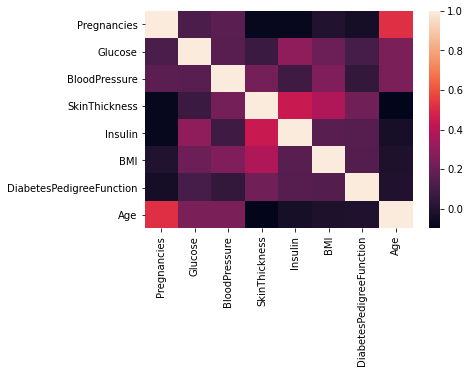

In [27]:
sns.heatmap(data.corr())

C:\Users\vagad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

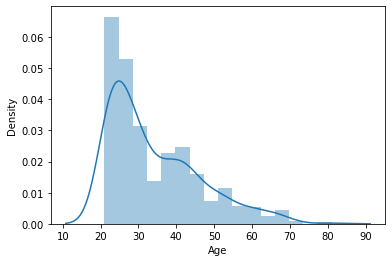

In [28]:
sns.distplot(data['Age'])

<AxesSubplot:ylabel='Density'>

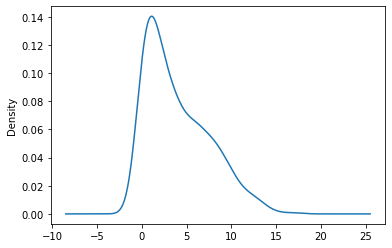

In [29]:
data['Pregnancies'].plot(kind='kde')

In [30]:
Y=data['Diabetes']

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

In [32]:
from sklearn.model_selection import train_test_split
X=data[['Age','Pregnancies']]
# Y=data['Diabetes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [35]:
knn_predictions=knn_model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Confusion Matrix - \n',confusion_matrix(Y_test,knn_predictions))
print('\n')
print('Classification Report - \n',classification_report(Y_test,knn_predictions))
print('\n')
print('Accuracy Of Our Model -',accuracy_score(Y_test,knn_predictions))

Confusion Matrix - 
 [[60 31]
 [32 42]]


Classification Report - 
               precision    recall  f1-score   support

           0       0.65      0.66      0.66        91
           1       0.58      0.57      0.57        74

    accuracy                           0.62       165
   macro avg       0.61      0.61      0.61       165
weighted avg       0.62      0.62      0.62       165



Accuracy Of Our Model - 0.6181818181818182


In [37]:
knn_predictions.shape

(165,)

In [38]:
Y_test.shape

(165,)

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
probs =knn_model.predict_proba(X_test)
fpr,tpr,treshold=roc_curve(Y_test,probs[:,1])
roc_auc=roc_auc_score(Y_test,probs[:,1])
roc_auc

0.6732254232254233

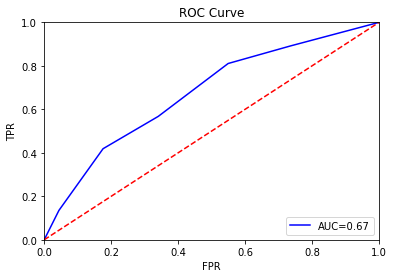

In [42]:
plt.title("ROC Curve")
plt.plot(fpr,tpr,"b",label="AUC=%0.2f" %roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()